## TP2 Implémentation d'un Algorithme pour simuler des parties de pendu et mesurer les performances pour une politique deterministe

Vous allez implémenter une boucle qui simule plusieurs parties d'un jeu de pendu en utilisant un environnement personnalisé (HangedManEnv). Vous allez enregistrer les performances de l'agent, comme les récompenses obtenues et les actions choisies à chaque épisode.

#### 1. __Contexte :__
Vous avez à disposition un environnement appelé __HangedManEnv__, qui représente un jeu de pendu. À chaque épisode, l'agent doit essayer de deviner un mot en choisissant des lettres. Le but est de mesurer les performances de l'agent à travers plusieurs épisodes (ou parties).

#### 2.__Étapes à suivre :__

##### 2.1 __Initialisation :__

- __Initialisation des variables:__ 

__n_episode__ : Nombre total d'épisodes (parties) à simuler.
__hist_reward__ : Un tableau qui va stocker les récompenses cumulées à chaque épisode.
__hist_actions__ : Un tableau pour enregistrer les actions choisies par l'agent à chaque étape de chaque épisode.

- __Initialisation de l'environnement :__

Vous allez instancier l'environnement HangedManEnv() pour permettre à l'agent de jouer plusieurs parties.

#### 2.2 __Boucle sur les épisodes :__

À chaque épisode, réinitialisez l'environnement en appelant la méthode reset(), puis démarrez une boucle où l'agent choisit des actions jusqu'à la fin de la partie.

- __Choix des actions (politique déterministe) :__

À chaque étape de l'épisode, l'agent choisit une action parmi les actions possibles (les lettres qui n'ont pas encore été essayées).
L'action est sélectionnée de manière aléatoire parmi les actions encore disponibles.
Exécution de l'action :

Utilisez la méthode step() pour appliquer l'action choisie et obtenir l'état suivant, la récompense associée, et vérifier si la partie est terminée.
Enregistrer les résultats :

À chaque étape, enregistrez l'action jouée dans le tableau hist_actions et ajoutez la récompense obtenue dans hist_reward.

#### 2.3 __Fermer l'environnement__ : Une fois tous les épisodes joués, fermez l'environnement.

Ces données pourront ensuite être utilisées pour analyser les performances de l'agent au cours des épisodes.

## Correction 

In [1]:
import numpy as np
import random
from My_custom_Envs import HangedManEnv

In [2]:
## Les mesures que l'on va garder par épisode 
n_episode = 1000
# les rewards obtenu par épisodes 
hist_reward = np.zeros(n_episode)
# l'ordre les lettres choisies ( dictionnaire de liste)
hist_actions = np.zeros((26, n_episode))


env = HangedManEnv()
# Initialisation de l'environnement

for episode in range(n_episode):
    
    # Restart episode
    obs, info = env.reset()
    terminated = False
    step = 1
    while not terminated: 

        ## Determinist Policie
        possible_actions = [i for i , a in enumerate(obs[1])  if not a ] #get all possible actions
        action = random.choice(possible_actions) 

        ## Playing the action
        obs , reward, terminated, _, _  =env.step( action )  
        hist_actions[ action, episode ] = step
        hist_reward[episode] = hist_reward[episode] + reward
        step = step + 1 

env.close()

In [3]:
window_size = 100
moving_avg_rewards = np.convolve(hist_reward, np.ones(window_size)/window_size, mode='valid')

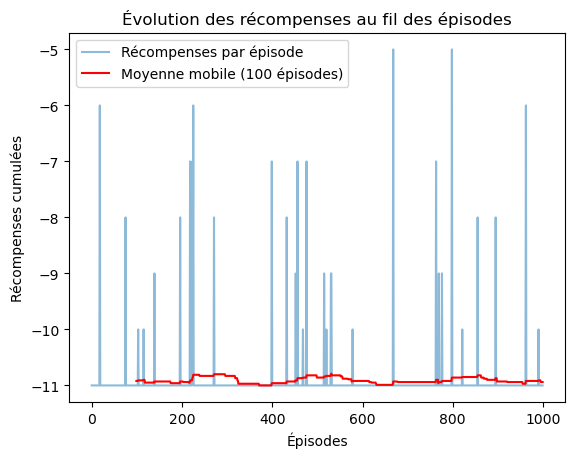

In [4]:
import matplotlib.pyplot as plt
# Tracer l'évolution des récompenses par épisode
plt.plot(range(n_episode), hist_reward, label='Récompenses par épisode', alpha=0.5)
plt.plot(range(window_size-1, n_episode), moving_avg_rewards, label=f'Moyenne mobile ({window_size} épisodes)', color='red')
# Ajouter un titre et des labels
plt.title("Évolution des récompenses au fil des épisodes")
plt.xlabel("Épisodes")
plt.ylabel("Récompenses cumulées")

# Afficher la légende et le graphique
plt.legend()
plt.show()

In [5]:
n_victories = sum(hist_reward > -11 )

In [6]:
# Calcul de la probabilité de gagner
probability_of_winning = n_victories / n_episode
print(f"Probabilité de gagner après {n_episode} parties : {probability_of_winning:.2f}")


from statsmodels.stats.proportion import proportion_confint
confidence_level = 0.95  # Intervalle de confiance à 95%


# Calculer l'intervalle de confiance avec l'approximation normale (méthode 'normal')
lower_bound, upper_bound = proportion_confint(n_victories, n_episode, alpha=1-confidence_level, method='normal')

print(f"Proportion observée : {probability_of_winning:.4f}")
print(f"Intervalle de confiance à 95% : [{lower_bound:.4f}, {upper_bound:.4f}]")

Probabilité de gagner après 1000 parties : 0.03
Proportion observée : 0.0320
Intervalle de confiance à 95% : [0.0211, 0.0429]



​
